<a href="https://colab.research.google.com/github/dineshjakkam/machine-learning-projects/blob/master/models/colab/cos_wave_model_tinyml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the basics of TinyML
* The goal of this project is to train a simple model that can take a value x, 
and predicts its cos *(trignometric function)*, y.

* In a real-world if you need a cos value, we can just directly call it as cos(x). But as part of this learning experience, we train a model using TensorFlow lite framework to predict its cosine given a value x.
* Later will deploy this model onto the ARM based microcontroller and control one of its peripherals through the deployed model inference.

## Import libraries

In [1]:
# Install TensoFlow Library
!pip install tensorflow==2.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import math

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 450kB 45.7MB/s 
     |████████████████████████████████| 3.8MB 43.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9a5b07cc799265ee55129bd1859c485a8be06cd735004e521cad4f35aa3c2b8f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: t

## Generating samples

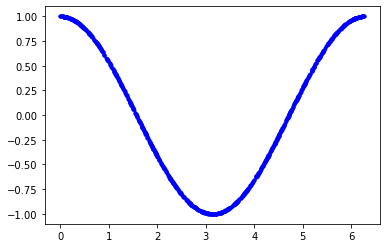

In [2]:
SAMPLES = 1000
# Seed value to get the same random numbers each time we run this
# notebook. This can be of any value
SEED = 1993
np.random.seed(SEED)
tf.random.set_seed(SEED)

# np.random.unifrom generates the uniformly distributed random value 
# starting 0 to 2*pi, which cover complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to make sure they are not in order
np.random.shuffle(x_values)

# calculate corresponding cos values
y_values = np.cos(x_values)

# Plot the values using matplotlib
# b dot indicates blue dots
plt.plot(x_values, y_values, 'b.')
plt.show()

### Add noise to the samples

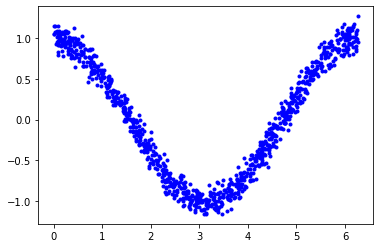

In [3]:
# Add a small random number to each y_value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot the values using matplotlib
# b dot indicates blue dots
plt.plot(x_values, y_values, 'b.')
plt.show()

### Split the data

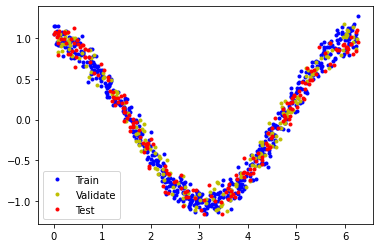

In [4]:
# We use 60% of data for training, 20% for validation and the
# remianing 20% for testing. Split the indices as required
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2*SAMPLES + TRAIN_SPLIT)

# Given two indices np.split chop the data into three parts
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data is each partition in different colors
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

## To create our model, we are going to design a simple neural newtork


1.   Create a sequential model using Keras
2.   Define three dense layers with 16 neurons in the intermediate layers



In [5]:
from tensorflow.keras import layers
model = tf.keras.Sequential()

# First layers takes a scalar input and feeds it through 16 neurons
# The *rectified linear unit* (ReLu) activation function, decide wether
# to activate the neuron or not
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# second desned layer
model.add(layers.Dense(16, activation='relu'))

# Final layer is a single, since we want to output a single value
model.add(layers.Dense(1))

# Compile the model using standard optimizer and loss function for regression
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [6]:
history = model.fit(x_train, y_train, epochs=600, batch_size=16,
                    validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.5862 - mae: 0.6593 - val_loss: 0.4777 - val_mae: 0.6007
Epoch 2/600
600/600 [==============================] - 0s 143us/sample - loss: 0.5166 - mae: 0.6398 - val_loss: 0.4490 - val_mae: 0.5851
Epoch 3/600
600/600 [==============================] - 0s 157us/sample - loss: 0.4970 - mae: 0.6257 - val_loss: 0.4282 - val_mae: 0.5711
Epoch 4/600
600/600 [==============================] - 0s 146us/sample - loss: 0.4723 - mae: 0.6044 - val_loss: 0.4049 - val_mae: 0.5532
Epoch 5/600
600/600 [==============================] - 0s 144us/sample - loss: 0.4522 - mae: 0.5899 - val_loss: 0.3848 - val_mae: 0.5356
Epoch 6/600
600/600 [==============================] - 0s 146us/sample - loss: 0.4296 - mae: 0.5673 - val_loss: 0.3532 - val_mae: 0.5059
Epoch 7/600
600/600 [==============================] - 0s 143us/sample - loss: 0.3994 - mae: 0.5376 - val_loss: 0.3298 - val_mae: 0.47

## Graphs for the obtained results

### Plot the loss

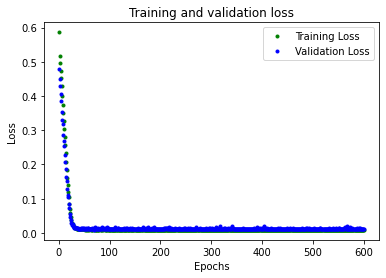

In [7]:
# training loss
loss = history.history['loss']
# validation loss
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'g.', label='Training Loss')
plt.plot(epochs, val_loss, 'b.', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

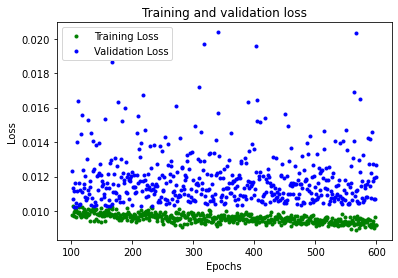

In [8]:
# To better see the result skip the first 100 epochs 
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the mean absolute error

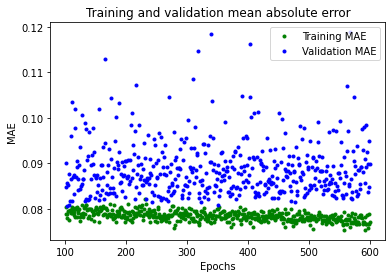

In [9]:
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Testing


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

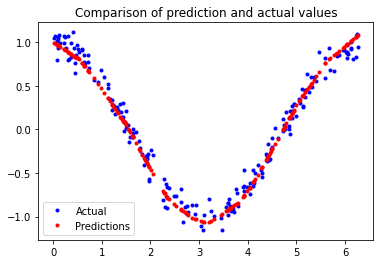

In [10]:
# Calculate and print the loss on the test dataset
loss = model.evaluate(x_test, y_test)

#Make predictions based on our test dataset
predictions = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of prediction and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predictions')
plt.legend()
plt.show()

## Convert the model to the TensorFlow Lite format

### Without quantization

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# save the model to disk
open("cos_model.tflite", "wb").write(tflite_model)

2700

### With quatization

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# indicate that we want to perform default optimization which
# includes quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# To create a quantized model that runs as efficiently as possible,
# we neeed to provide a *representative dataset* -  a set of numbers
# that represent the full range of input values of the dataset on which 
# the model was trained (as generator function)
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

#convert the model
tflite_model = converter.convert()

# save the model to disk
open("cos_model_quantized.tflite", "wb").write(tflite_model)


2488

## Converting to C file


*   Given our limited space on the microcontorller, the extra code required to load a model from disk would be wasteful. So, as an elegant solution we will provide the model in a C source file that can be included in our binary and loaded directly into the memory on the microcontroller. 
*   Fortunately, there is a convinient Unix tool named "xxd" that is able to convert a given file into the required format 



In [14]:
# Install xxd if it is not available
!apt-get -qq install xxd
# save the file as C source file
!xxd -i cos_model_quantized.tflite > cos_model_quantized.cc
# print the source file to verify.
# the model is expectd to store as an array of bytes
!cat cos_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.3_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.3) ...
Setting up xxd (2:8.0.1453-1ubuntu1.3) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char cos_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x44, 0x09, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00,
  0x90, 0x02, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x0b, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 